In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier


In [6]:
df = pd.read_csv("Customer_Churn_Dataset.csv")


In [7]:
df

,age,income,balance,transactions,credit_score,tenure,churn
0,56,97879,80201,74,653,6.0,0
1,69,59859,8640,61,399,1.7,0
2,46,67098,161121,95,577,7.4,0
3,32,137413,136690,8,790,3.0,0
4,60,15526,187125,67,554,6.6,0
...,...,...,...,...,...,...,...
1995,63,30534,167516,49,784,0.1,0
1996,67,100280,166412,42,355,0.3,0
1997,69,51320,105219,76,522,8.5,0
1998,24,64170,5033,66,478,6.8,0


In [9]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           2000 non-null   int64  
 1   income        2000 non-null   int64  
 2   balance       2000 non-null   int64  
 3   transactions  2000 non-null   int64  
 4   credit_score  2000 non-null   int64  
 5   tenure        2000 non-null   float64
 6   churn         2000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 109.5 KB


,age,income,balance,transactions,credit_score,tenure,churn
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,43.805500,81687.716000,100384.042500,50.825500,572.447000,4.857550,0.00250
std,14.929203,38806.602132,57453.096633,28.349707,158.088318,2.816723,0.04995
min,18.000000,15138.000000,192.000000,1.000000,300.000000,0.000000,0.00000
25%,31.000000,47352.750000,50512.750000,26.000000,434.750000,2.500000,0.00000
50%,44.000000,81792.000000,100149.500000,52.000000,573.000000,4.800000,0.00000
75%,56.000000,114244.000000,151089.750000,75.000000,710.000000,7.200000,0.00000
max,69.000000,149837.000000,199967.000000,99.000000,849.000000,10.000000,1.00000


In [10]:
df["churn"].value_counts(normalize=True)


churn
0    0.9975
1    0.0025
Name: proportion, dtype: float64

In [11]:
X = df.drop("churn", axis=1)
y = df["churn"]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
model = XGBClassifier(
    # n_estimators=200,
    # learning_rate=0.05,
    # max_depth=4,
    # min_child_weight=3,
    # gamma=0.1,
    # subsample=0.8,
    # colsample_bytree=0.8,
    # reg_lambda=1,
    # eval_metric='logloss'
)


In [14]:
model.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [15]:
y_pred = model.predict(X_test)


In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       0.00      0.00      0.00         1

    accuracy                           1.00       400
   macro avg       0.50      0.50      0.50       400
weighted avg       1.00      1.00      1.00       400

[[399   0]
 [  1   0]]


c:\Users\victus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\victus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\victus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

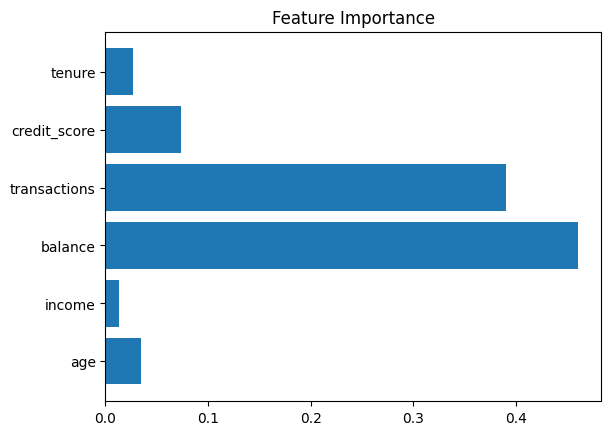

In [17]:
import matplotlib.pyplot as plt

plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.show()
